# Th17 Pathway Case Study: Spillover Analysis

**Goal**: Examine spillover effects from IL23R GWAS discovery (2007) on Th17 pathway genes for IBD patenting

**Data**: 25 genes × 21 years (2000-2020) with full spillover metadata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Create output directory
output_dir = Path('graphs_v2')
output_dir.mkdir(exist_ok=True)

## Section 1: Load and Explore Data

In [2]:
# Load data
df = pd.read_parquet('th17_panel_with_spillovers.parquet')

print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head(10)

Shape: (525, 22)

Columns: ['gene_id', 'disease_id', 'gwas_year', 'gene_prob', 'dis_prob', 'gene_abstract', 'gene_title', 'dis_abstract', 'dis_title', 'patent_year', 'num_patents', 'extensive_flag', 'gwas_1hop', 'gwas_2hop', 'gwas_3hop', 'gwas_source_1hop', 'gwas_source_2hop', 'gwas_source_3hop', 'gwas_0hop', 'gwas_level', 'gwas_year_chosen', 'gwas_source_gene']

Data types:
gene_id               int32
disease_id           object
gwas_year             Int16
gene_prob           float32
dis_prob            float32
gene_abstract       float32
gene_title          float32
dis_abstract        float32
dis_title           float32
patent_year           int16
num_patents           int16
extensive_flag         int8
gwas_1hop             Int16
gwas_2hop             Int16
gwas_3hop             Int16
gwas_source_1hop      Int32
gwas_source_2hop      Int32
gwas_source_3hop      Int32
gwas_0hop           float64
gwas_level             Int8
gwas_year_chosen      Int16
gwas_source_gene      Int32
dtype:

,gene_id,disease_id,gwas_year,gene_prob,dis_prob,gene_abstract,gene_title,dis_abstract,dis_title,patent_year,...,gwas_1hop,gwas_2hop,gwas_3hop,gwas_source_1hop,gwas_source_2hop,gwas_source_3hop,gwas_0hop,gwas_level,gwas_year_chosen,gwas_source_gene
0,7040,D015212,<NA>,0.998016,0.999999,0.0,0.0,0.0,0.0,2000,...,2010,<NA>,<NA>,4088,<NA>,<NA>,NaN,1,2010,4088
1,3570,D015212,2016,0.998429,0.999998,1.0,0.0,2.0,2.0,2000,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2016.0,0,2016,<NA>
2,1432,D015212,<NA>,0.999918,0.999999,0.0,0.0,0.0,0.0,2000,...,2009,<NA>,<NA>,2212,<NA>,<NA>,NaN,1,2009,2212
3,7040,D015212,<NA>,0.998016,0.999999,0.0,0.0,0.0,0.0,2001,...,2010,<NA>,<NA>,4088,<NA>,<NA>,NaN,1,2010,4088
4,3570,D015212,2016,0.998429,0.999998,1.0,0.0,2.0,2.0,2001,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2016.0,0,2016,<NA>
5,1432,D015212,<NA>,0.999918,0.999999,0.0,0.0,0.0,0.0,2001,...,2009,<NA>,<NA>,2212,<NA>,<NA>,NaN,1,2009,2212
6,7040,D015212,<NA>,0.998016,0.999999,0.0,0.0,0.0,0.0,2002,...,2010,<NA>,<NA>,4088,<NA>,<NA>,NaN,1,2010,4088
7,3570,D015212,2016,0.998429,0.999998,1.0,0.0,2.0,2.0,2002,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2016.0,0,2016,<NA>
8,1432,D015212,<NA>,0.999918,0.999999,0.0,0.0,0.0,0.0,2002,...,2009,<NA>,<NA>,2212,<NA>,<NA>,NaN,1,2009,2212
9,7040,D015212,<NA>,0.998016,0.999999,0.0,0.0,0.0,0.0,2003,...,2010,<NA>,<NA>,4088,<NA>,<NA>,NaN,1,2010,4088


In [3]:
# Basic summary
print("Summary Statistics:")
df.describe()

Summary Statistics:


,gene_id,gwas_year,gene_prob,dis_prob,gene_abstract,gene_title,dis_abstract,dis_title,patent_year,num_patents,...,gwas_1hop,gwas_2hop,gwas_3hop,gwas_source_1hop,gwas_source_2hop,gwas_source_3hop,gwas_0hop,gwas_level,gwas_year_chosen,gwas_source_gene
count,525.000000,105.0,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,...,420.0,0.0,0.0,420.0,0.0,0.0,105.000000,525.0,525.0,420.0
mean,22214.040000,2010.6,0.995643,0.999743,0.880000,0.280000,0.960000,0.160000,2010.000000,0.721905,...,2008.8,<NA>,<NA>,19748.4,<NA>,<NA>,2010.600000,0.8,2009.16,19748.4
std,37058.612419,3.215348,0.002837,0.001252,1.682555,0.531166,1.823385,0.543104,6.061076,1.623655,...,1.365445,<NA>,<NA>,43241.735128,<NA>,<NA>,3.215348,0.400381,2.015474,43241.735128
min,861.000000,2007.0,0.990090,0.993615,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,...,2007.0,<NA>,<NA>,2212.0,<NA>,<NA>,2007.000000,0.0,2007.0,2212.0
25%,3572.000000,2008.0,0.993188,0.999998,0.000000,0.000000,0.000000,0.000000,2005.000000,0.000000,...,2008.0,<NA>,<NA>,4088.0,<NA>,<NA>,2008.000000,1.0,2008.0,4088.0
50%,4773.000000,2010.0,0.995252,0.999999,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,...,2008.0,<NA>,<NA>,6774.0,<NA>,<NA>,2010.000000,1.0,2008.0,6774.0
75%,7046.000000,2012.0,0.998429,0.999999,1.000000,0.000000,1.000000,0.000000,2015.000000,1.000000,...,2009.25,<NA>,<NA>,6774.0,<NA>,<NA>,2012.000000,1.0,2010.0,6774.0
max,149233.000000,2016.0,0.999918,1.000000,7.000000,2.000000,7.000000,2.000000,2020.000000,13.000000,...,2012.0,<NA>,<NA>,149233.0,<NA>,<NA>,2016.000000,1.0,2016.0,149233.0


In [4]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


gene_id               0
disease_id            0
gwas_year           420
gene_prob             0
dis_prob              0
gene_abstract         0
gene_title            0
dis_abstract          0
dis_title             0
patent_year           0
num_patents           0
extensive_flag        0
gwas_1hop           105
gwas_2hop           525
gwas_3hop           525
gwas_source_1hop    105
gwas_source_2hop    525
gwas_source_3hop    525
gwas_0hop           420
gwas_level            0
gwas_year_chosen      0
gwas_source_gene    105
dtype: int64

## Phase 1: Descriptive Statistics

### 1. Gene-level Summary Table

In [5]:
# Create gene-level summary
gene_summary = df.groupby('gene_id').agg({
    'num_patents': 'sum',
    'gwas_year': 'first',
    'gwas_level': 'first',
    'gwas_year_chosen': 'first',
    'gwas_source_gene': 'first'
}).reset_index()

gene_summary.columns = ['gene_id', 'total_patents', 'gwas_year', 'spillover_level', 
                        'spillover_year', 'source_gene']

# Add gene type column
gene_summary['gene_type'] = gene_summary['spillover_level'].apply(
    lambda x: 'Direct GWAS' if x == 0 else ('Spillover' if x == 1 else 'Unknown')
)

# Sort by total patents
gene_summary = gene_summary.sort_values('total_patents', ascending=False)

print(f"Total genes: {len(gene_summary)}")
print(f"Direct GWAS genes: {(gene_summary['spillover_level'] == 0).sum()}")
print(f"Spillover genes: {(gene_summary['spillover_level'] == 1).sum()}")
print("\nGene Summary Table:")
gene_summary

Total genes: 25
Direct GWAS genes: 5
Spillover genes: 20

Gene Summary Table:


,gene_id,total_patents,gwas_year,spillover_level,spillover_year,source_gene,gene_type
1,1432,73,<NA>,1,2009,2212,Spillover
8,3605,48,<NA>,1,2008,6774,Spillover
14,6097,38,2012,0,2012,<NA>,Direct GWAS
5,3570,31,2016,0,2016,<NA>,Direct GWAS
17,7040,27,<NA>,1,2010,4088,Spillover
23,112744,26,<NA>,1,2008,6774,Spillover
24,149233,19,2007,0,2007,<NA>,Direct GWAS
22,59067,17,<NA>,1,2008,6774,Spillover
15,6774,17,2008,0,2008,<NA>,Direct GWAS
20,50616,15,<NA>,1,2008,6774,Spillover


In [6]:
# Separate direct GWAS and spillover genes
direct_genes = gene_summary[gene_summary['spillover_level'] == 0].copy()
spillover_genes = gene_summary[gene_summary['spillover_level'] == 1].copy()

print("Direct GWAS Genes:")
print(direct_genes[['gene_id', 'total_patents', 'gwas_year']].to_string(index=False))
print(f"\nSpillover Genes (showing top 10):")
print(spillover_genes[['gene_id', 'total_patents', 'spillover_year', 'source_gene']].head(10).to_string(index=False))

Direct GWAS Genes:
 gene_id  total_patents  gwas_year
    6097             38       2012
    3570             31       2016
  149233             19       2007
    6774             17       2008
    4088              2       2010

Spillover Genes (showing top 10):
 gene_id  total_patents  spillover_year  source_gene
    1432             73            2009         2212
    3605             48            2008         6774
    7040             27            2010         4088
  112744             26            2008         6774
   59067             17            2008         6774
   50616             15            2008         6774
    3091             14            2008         6774
    2475             13            2012         5579
   50615              8            2008         6774
    3594              7            2008         6774


In [7]:
# Save gene summary to CSV
gene_summary.to_csv(output_dir / 'gene_summary.csv', index=False)
print(f"Saved gene summary to {output_dir / 'gene_summary.csv'}")

Saved gene summary to graphs_v2/gene_summary.csv


### 2. Time Series Summary

In [8]:
# Total patents per year
yearly_summary = df.groupby('patent_year').agg({
    'num_patents': 'sum',
    'gene_id': 'count'
}).reset_index()
yearly_summary.columns = ['year', 'total_patents', 'num_genes']

# Count genes with patents per year
genes_with_patents = df[df['num_patents'] > 0].groupby('patent_year')['gene_id'].nunique().reset_index()
genes_with_patents.columns = ['year', 'genes_with_patents']
yearly_summary = yearly_summary.merge(genes_with_patents, on='year', how='left')

print("Yearly Summary:")
yearly_summary

Yearly Summary:


,year,total_patents,num_genes,genes_with_patents
0,2000,6,25,3
1,2001,5,25,2
2,2002,11,25,2
3,2003,15,25,3
4,2004,7,25,2
5,2005,4,25,3
6,2006,5,25,3
7,2007,13,25,6
8,2008,8,25,3
9,2009,5,25,4


In [9]:
# Patents by spillover level per year
# Add spillover level to main df
df_merged = df.merge(gene_summary[['gene_id', 'spillover_level', 'gene_type']], on='gene_id', how='left')

level_summary = df_merged.groupby(['patent_year', 'gene_type'])['num_patents'].sum().reset_index()
level_pivot = level_summary.pivot(index='patent_year', columns='gene_type', values='num_patents').fillna(0)

print("\nPatents by Gene Type (per year):")
level_pivot


Patents by Gene Type (per year):


gene_type,Direct GWAS,Spillover
patent_year,,
2000,2,4
2001,2,3
2002,0,11
2003,1,14
2004,1,6
2005,0,4
2006,1,4
2007,0,13
2008,0,8


In [10]:
# Save yearly summary
yearly_summary.to_csv(output_dir / 'yearly_summary.csv', index=False)
level_pivot.to_csv(output_dir / 'yearly_by_type.csv')
print(f"Saved yearly summaries to {output_dir}")

Saved yearly summaries to graphs_v2


### 3. Key Events Timeline

In [11]:
# Timeline of GWAS discoveries
gwas_events = direct_genes[['gene_id', 'gwas_year']].dropna().sort_values('gwas_year')
print("Direct GWAS Discovery Timeline:")
print(gwas_events.to_string(index=False))

# Spillover timing
spillover_timing = spillover_genes['spillover_year'].value_counts().sort_index()
print("\nSpillover Year Distribution:")
print(spillover_timing)

# Key dates
print("\n=== Key Events ===")
print(f"IL23R discovery: 2007")
print(f"First GWAS in dataset: {gwas_events['gwas_year'].min():.0f}")
print(f"Last GWAS in dataset: {gwas_events['gwas_year'].max():.0f}")
print(f"Most common spillover year: {spillover_timing.idxmax():.0f}")
print(f"Years between IL23R and most spillovers: {spillover_timing.idxmax() - 2007:.0f}")

Direct GWAS Discovery Timeline:
 gene_id  gwas_year
  149233       2007
    6774       2008
    4088       2010
    6097       2012
    3570       2016

Spillover Year Distribution:
spillover_year
2007    2
2008    9
2009    4
2010    3
2012    2
Name: count, dtype: Int64

=== Key Events ===
IL23R discovery: 2007
First GWAS in dataset: 2007
Last GWAS in dataset: 2016
Most common spillover year: 2008
Years between IL23R and most spillovers: 1


## Phase 2: Simple Visualizations

### Plot 1: IL23R Time Series

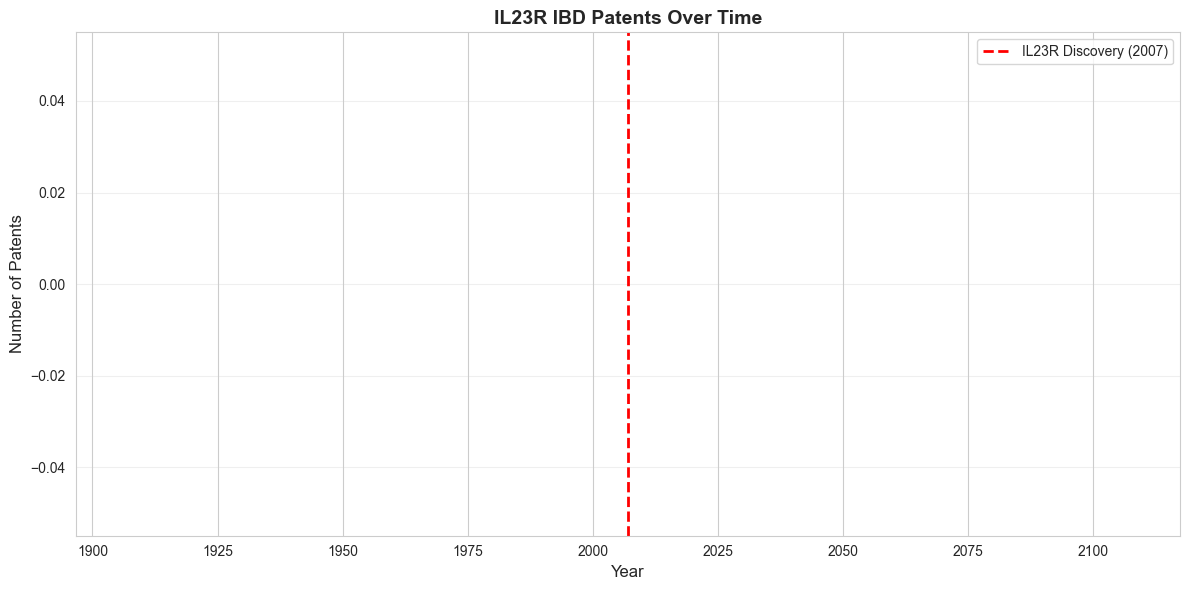

IL23R - Mean patents pre-2007: nan
IL23R - Mean patents post-2007: nan
Change: nan (+nan%)


In [12]:
# Filter for IL23R
il23r_data = df[df['gene_id'] == 'IL23R'].sort_values('patent_year')

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(il23r_data['patent_year'], il23r_data['num_patents'], color='steelblue', alpha=0.7)
ax.axvline(x=2007, color='red', linestyle='--', linewidth=2, label='IL23R Discovery (2007)')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Patents', fontsize=12)
ax.set_title('IL23R IBD Patents Over Time', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'plot1_il23r_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate pre/post stats
pre_2007 = il23r_data[il23r_data['patent_year'] < 2007]['num_patents'].mean()
post_2007 = il23r_data[il23r_data['patent_year'] >= 2007]['num_patents'].mean()
print(f"IL23R - Mean patents pre-2007: {pre_2007:.2f}")
print(f"IL23R - Mean patents post-2007: {post_2007:.2f}")
print(f"Change: {post_2007 - pre_2007:.2f} (+{((post_2007/pre_2007 - 1) * 100):.1f}%)")

### Plot 2: Direct GWAS vs Spillovers

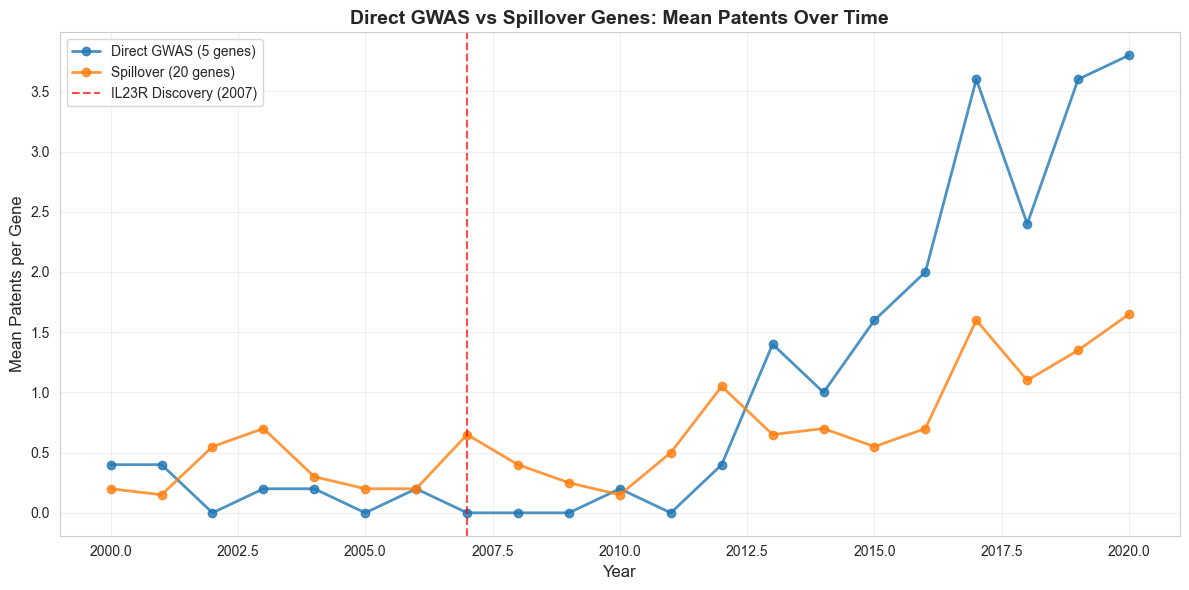


Direct GWAS:
  Pre-2007 mean: 0.200
  Post-2007 mean: 1.429
  Change: 1.229 (+614.3%)

Spillover:
  Pre-2007 mean: 0.329
  Post-2007 mean: 0.807
  Change: 0.479 (+145.7%)


In [13]:
# Calculate mean patents per year by gene type
yearly_by_type = df_merged.groupby(['patent_year', 'gene_type'])['num_patents'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

for gene_type in ['Direct GWAS', 'Spillover']:
    data = yearly_by_type[yearly_by_type['gene_type'] == gene_type]
    ax.plot(data['patent_year'], data['num_patents'], marker='o', linewidth=2, 
            label=f"{gene_type} ({len(gene_summary[gene_summary['gene_type'] == gene_type])} genes)",
            alpha=0.8)

ax.axvline(x=2007, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='IL23R Discovery (2007)')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mean Patents per Gene', fontsize=12)
ax.set_title('Direct GWAS vs Spillover Genes: Mean Patents Over Time', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'plot2_direct_vs_spillover.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistics
for gene_type in ['Direct GWAS', 'Spillover']:
    data = df_merged[df_merged['gene_type'] == gene_type]
    pre = data[data['patent_year'] < 2007]['num_patents'].mean()
    post = data[data['patent_year'] >= 2007]['num_patents'].mean()
    print(f"\n{gene_type}:")
    print(f"  Pre-2007 mean: {pre:.3f}")
    print(f"  Post-2007 mean: {post:.3f}")
    print(f"  Change: {post - pre:.3f} (+{((post/pre - 1) * 100 if pre > 0 else 0):.1f}%)")

### Plot 3: Spillover Timing Histogram

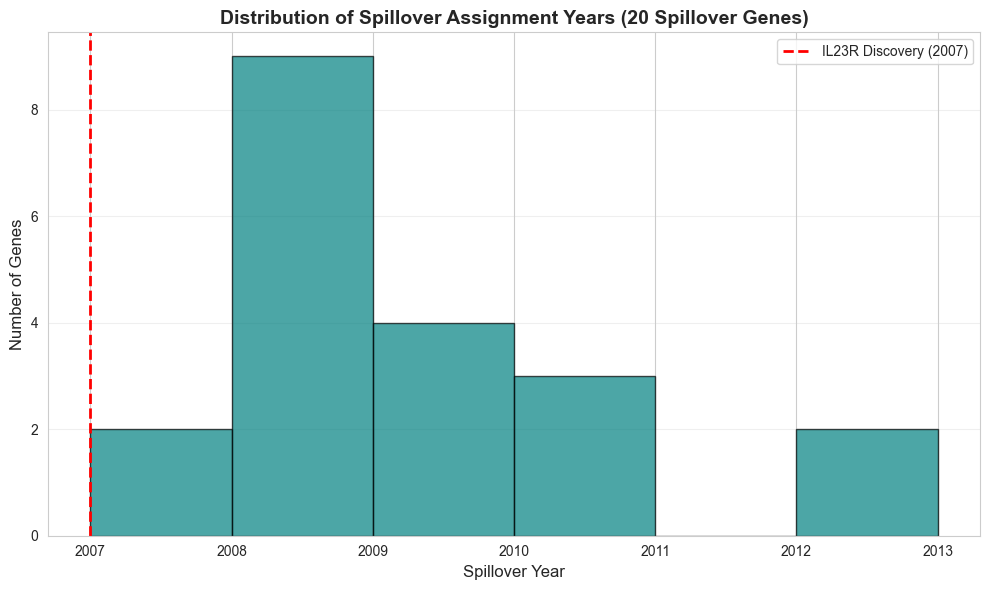

In [14]:
# Spillover year distribution
fig, ax = plt.subplots(figsize=(10, 6))
spillover_years = spillover_genes['spillover_year'].dropna()
ax.hist(spillover_years, bins=range(int(spillover_years.min()), int(spillover_years.max()) + 2), 
        color='teal', alpha=0.7, edgecolor='black')
ax.axvline(x=2007, color='red', linestyle='--', linewidth=2, label='IL23R Discovery (2007)')
ax.set_xlabel('Spillover Year', fontsize=12)
ax.set_ylabel('Number of Genes', fontsize=12)
ax.set_title('Distribution of Spillover Assignment Years (20 Spillover Genes)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'plot3_spillover_timing.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot 4: Pre vs Post 2007 Comparison

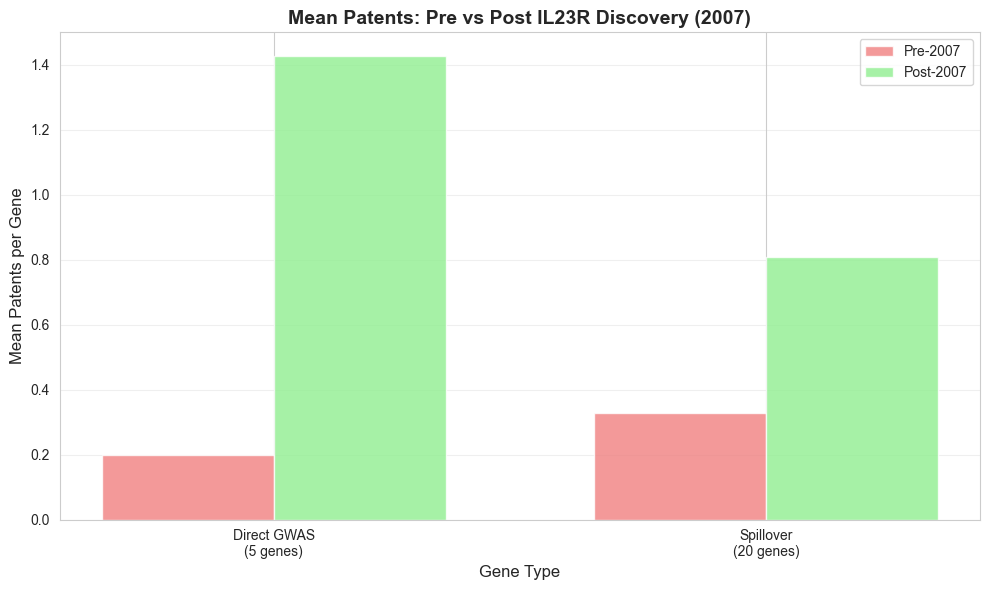

In [15]:
# Calculate pre/post means for each gene type
pre_post_stats = []
for gene_type in ['Direct GWAS', 'Spillover']:
    data = df_merged[df_merged['gene_type'] == gene_type]
    pre = data[data['patent_year'] < 2007]['num_patents'].mean()
    post = data[data['patent_year'] >= 2007]['num_patents'].mean()
    pre_post_stats.append({'Type': gene_type, 'Period': 'Pre-2007', 'Mean': pre})
    pre_post_stats.append({'Type': gene_type, 'Period': 'Post-2007', 'Mean': post})

pre_post_df = pd.DataFrame(pre_post_stats)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(['Direct GWAS', 'Spillover']))
width = 0.35

pre_data = pre_post_df[pre_post_df['Period'] == 'Pre-2007']
post_data = pre_post_df[pre_post_df['Period'] == 'Post-2007']

ax.bar(x - width/2, pre_data['Mean'], width, label='Pre-2007', color='lightcoral', alpha=0.8)
ax.bar(x + width/2, post_data['Mean'], width, label='Post-2007', color='lightgreen', alpha=0.8)

ax.set_xlabel('Gene Type', fontsize=12)
ax.set_ylabel('Mean Patents per Gene', fontsize=12)
ax.set_title('Mean Patents: Pre vs Post IL23R Discovery (2007)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Direct GWAS\n(5 genes)', 'Spillover\n(20 genes)'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'plot4_pre_post_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Phase 3: Gene-Specific Analysis

### Plot 5: Individual Gene Time Series (Small Multiples)

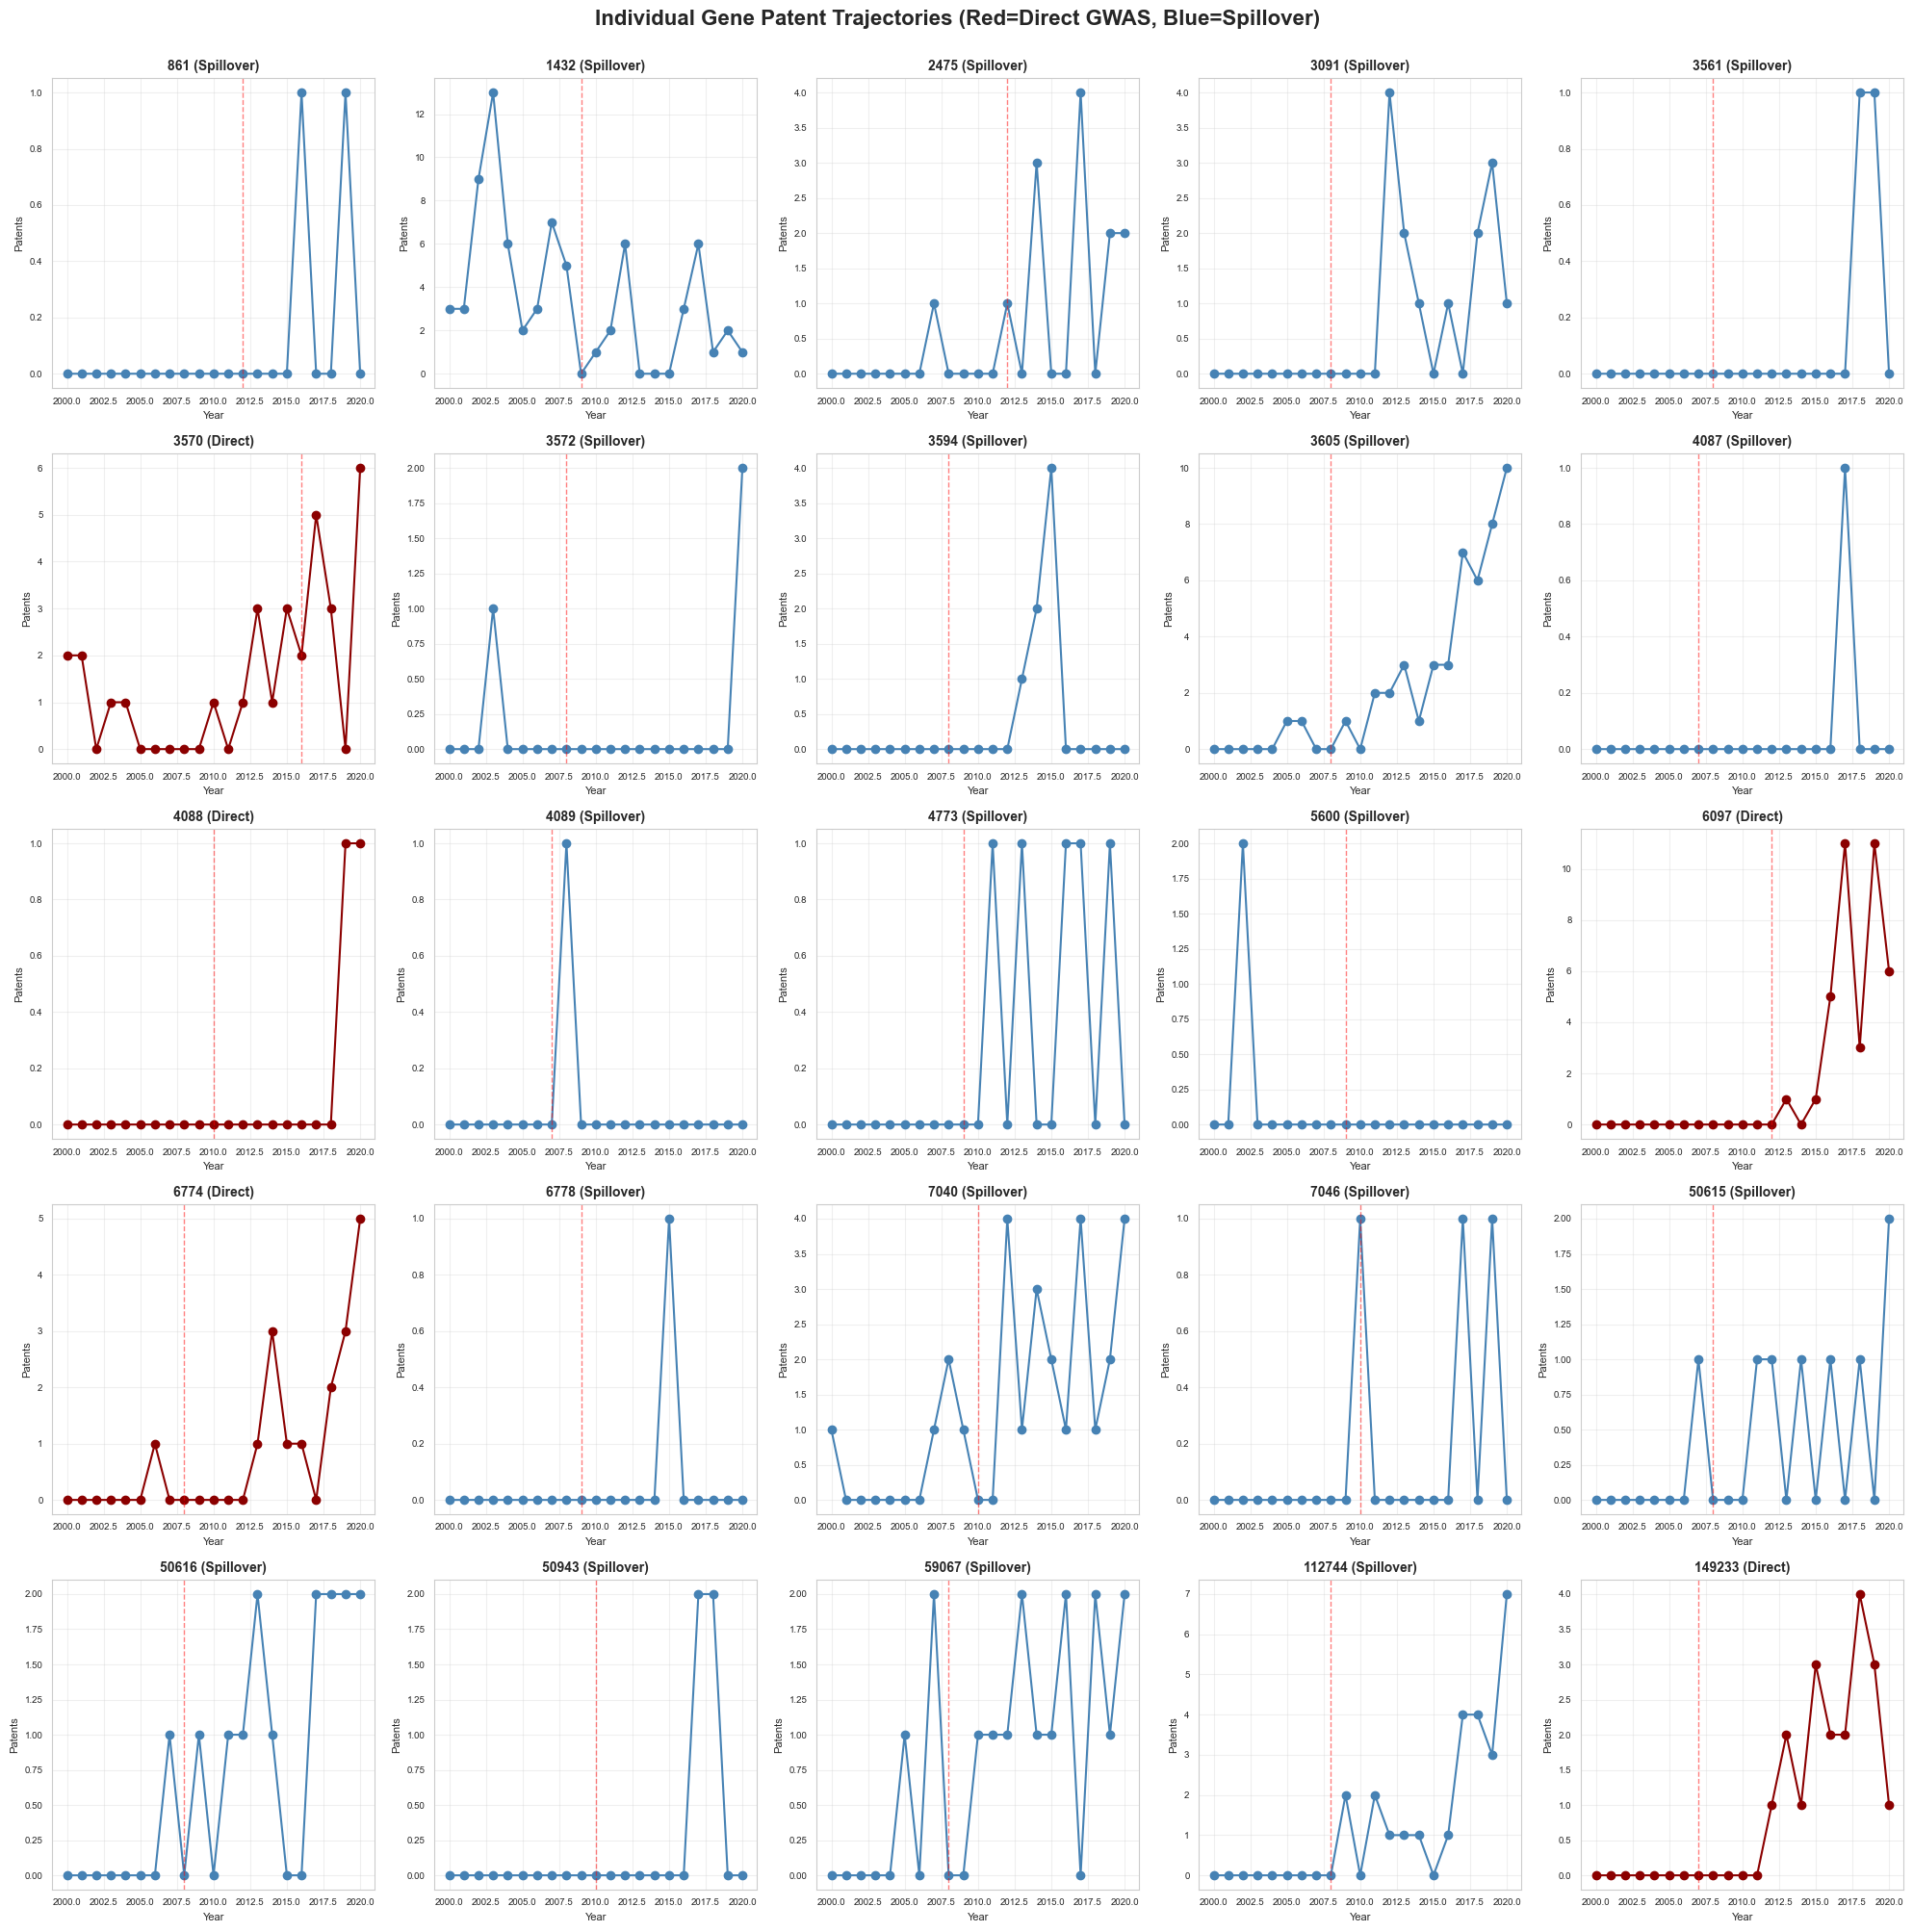

In [16]:
# Create small multiples for all genes
genes = sorted(df['gene_id'].unique())
n_genes = len(genes)
n_cols = 5
n_rows = int(np.ceil(n_genes / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, gene in enumerate(genes):
    ax = axes[idx]
    gene_data = df_merged[df_merged['gene_id'] == gene].sort_values('patent_year')
    gene_info = gene_summary[gene_summary['gene_id'] == gene].iloc[0]
    
    # Color by type
    color = 'darkred' if gene_info['spillover_level'] == 0 else 'steelblue'
    
    # Plot
    ax.plot(gene_data['patent_year'], gene_data['num_patents'], marker='o', color=color, linewidth=1.5)
    
    # Add vertical line for discovery/spillover year
    event_year = gene_info['gwas_year'] if pd.notna(gene_info['gwas_year']) else gene_info['spillover_year']
    if pd.notna(event_year):
        ax.axvline(x=event_year, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    # Labels
    gene_type_label = 'Direct' if gene_info['spillover_level'] == 0 else 'Spillover'
    ax.set_title(f"{gene} ({gene_type_label})", fontsize=10, fontweight='bold')
    ax.set_xlabel('Year', fontsize=8)
    ax.set_ylabel('Patents', fontsize=8)
    ax.grid(alpha=0.3)
    ax.tick_params(labelsize=7)

# Hide extra subplots
for idx in range(n_genes, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Individual Gene Patent Trajectories (Red=Direct GWAS, Blue=Spillover)', 
             fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.savefig(output_dir / 'plot5_individual_genes.png', dpi=300, bbox_inches='tight')
plt.show()

### Plot 6: Top Movers (Biggest Changes)

In [17]:
# Calculate change for each gene
gene_changes = []
for gene in df['gene_id'].unique():
    gene_data = df_merged[df_merged['gene_id'] == gene]
    pre = gene_data[gene_data['patent_year'] < 2007]['num_patents'].sum()
    post = gene_data[gene_data['patent_year'] >= 2007]['num_patents'].sum()
    
    # Get gene info
    gene_info = gene_summary[gene_summary['gene_id'] == gene].iloc[0]
    
    gene_changes.append({
        'gene': gene,
        'pre_total': pre,
        'post_total': post,
        'absolute_change': post - pre,
        'pct_change': ((post - pre) / pre * 100) if pre > 0 else (100 if post > 0 else 0),
        'gene_type': gene_info['gene_type']
    })

changes_df = pd.DataFrame(gene_changes).sort_values('absolute_change', ascending=False)

# Top 10 gainers and losers
top_gainers = changes_df.head(10)
top_losers = changes_df.tail(10).iloc[::-1]

print("Top 10 Gainers (Post-2007):")
print(top_gainers[['gene', 'pre_total', 'post_total', 'absolute_change', 'gene_type']].to_string(index=False))
print("\nTop 10 Losers (Post-2007):")
print(top_losers[['gene', 'pre_total', 'post_total', 'absolute_change', 'gene_type']].to_string(index=False))

Top 10 Gainers (Post-2007):
  gene  pre_total  post_total  absolute_change   gene_type
  3605          2          46               44   Spillover
  6097          0          38               38 Direct GWAS
112744          0          26               26   Spillover
  7040          1          26               25   Spillover
  3570          6          25               19 Direct GWAS
149233          0          19               19 Direct GWAS
 59067          1          16               15   Spillover
  6774          1          16               15 Direct GWAS
 50616          0          15               15   Spillover
  3091          0          14               14   Spillover

Top 10 Losers (Post-2007):
 gene  pre_total  post_total  absolute_change   gene_type
 1432         39          34               -5   Spillover
 5600          2           0               -2   Spillover
 3572          1           2                1   Spillover
 4089          0           1                1   Spillover
 4087

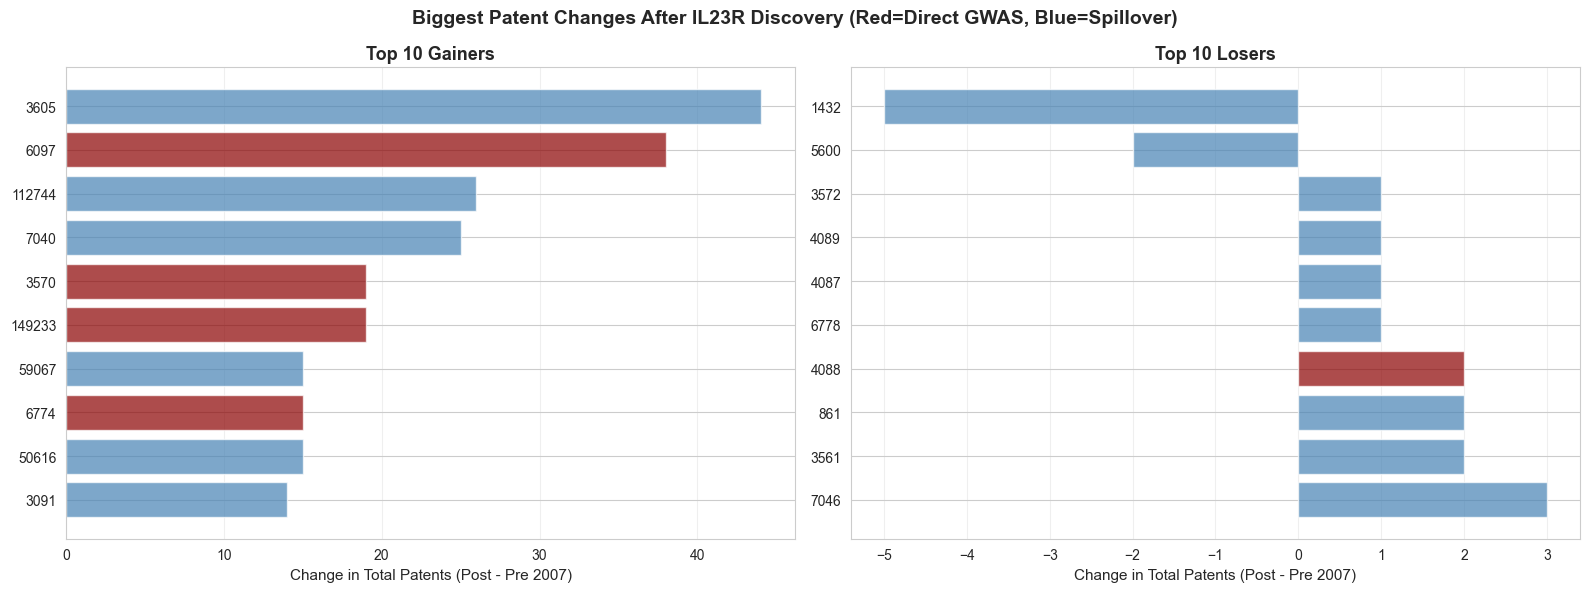

In [18]:
# Plot top gainers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 gainers
colors1 = ['darkred' if x == 'Direct GWAS' else 'steelblue' for x in top_gainers['gene_type']]
ax1.barh(range(len(top_gainers)), top_gainers['absolute_change'], color=colors1, alpha=0.7)
ax1.set_yticks(range(len(top_gainers)))
ax1.set_yticklabels(top_gainers['gene'])
ax1.set_xlabel('Change in Total Patents (Post - Pre 2007)', fontsize=11)
ax1.set_title('Top 10 Gainers', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Top 10 losers
colors2 = ['darkred' if x == 'Direct GWAS' else 'steelblue' for x in top_losers['gene_type']]
ax2.barh(range(len(top_losers)), top_losers['absolute_change'], color=colors2, alpha=0.7)
ax2.set_yticks(range(len(top_losers)))
ax2.set_yticklabels(top_losers['gene'])
ax2.set_xlabel('Change in Total Patents (Post - Pre 2007)', fontsize=11)
ax2.set_title('Top 10 Losers', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

fig.suptitle('Biggest Patent Changes After IL23R Discovery (Red=Direct GWAS, Blue=Spillover)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'plot6_top_movers.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Save changes data
changes_df.to_csv(output_dir / 'gene_changes.csv', index=False)
print(f"Saved gene changes to {output_dir / 'gene_changes.csv'}")

Saved gene changes to graphs_v2/gene_changes.csv


## Summary Statistics

In [21]:
print("="*80)
print("SUMMARY OF KEY FINDINGS")
print("="*80)

# Overall statistics
print("\n1. DATASET OVERVIEW")
print(f"   - Total genes: {len(df['gene_id'].unique())}")
print(f"   - Direct GWAS genes: {len(direct_genes)}")
print(f"   - Spillover genes: {len(spillover_genes)}")
print(f"   - Time period: {df['patent_year'].min():.0f}-{df['patent_year'].max():.0f}")
print(f"   - Total patents: {df['num_patents'].sum():.0f}")

# IL23R specific
il23r_pre = il23r_data[il23r_data['patent_year'] < 2007]['num_patents'].mean()
il23r_post = il23r_data[il23r_data['patent_year'] >= 2007]['num_patents'].mean()
print("\n2. IL23R (The Key Discovery Gene)")
print(f"   - Discovery year: 2007")
print(f"   - Mean patents pre-2007: {il23r_pre:.2f}")
print(f"   - Mean patents post-2007: {il23r_post:.2f}")
print(f"   - Change: +{il23r_post - il23r_pre:.2f} (+{((il23r_post/il23r_pre - 1) * 100):.1f}%)")

# Direct GWAS vs Spillover
print("\n3. DIRECT GWAS vs SPILLOVER COMPARISON")
for gene_type in ['Direct GWAS', 'Spillover']:
    data = df_merged[df_merged['gene_type'] == gene_type]
    pre = data[data['patent_year'] < 2007]['num_patents'].mean()
    post = data[data['patent_year'] >= 2007]['num_patents'].mean()
    print(f"\n   {gene_type}:")
    print(f"   - Pre-2007 mean: {pre:.3f} patents/gene/year")
    print(f"   - Post-2007 mean: {post:.3f} patents/gene/year")
    print(f"   - Change: +{post - pre:.3f} (+{((post/pre - 1) * 100 if pre > 0 else 0):.1f}%)")

# Top movers
print("\n4. TOP 5 GAINERS (Absolute Change)")
for idx, row in changes_df.head(5).iterrows():
    print(f"   {str(row['gene']):8s} ({row['gene_type']:12s}): +{row['absolute_change']:4.0f} patents ({row['pre_total']:.0f} → {row['post_total']:.0f})")

print("\n5. TOP 5 LOSERS (Absolute Change)")
for idx, row in changes_df.tail(5).iterrows():
    print(f"   {str(row['gene']):8s} ({row['gene_type']:12s}): {row['absolute_change']:4.0f} patents ({row['pre_total']:.0f} → {row['post_total']:.0f})")

print("\n" + "="*80)

SUMMARY OF KEY FINDINGS

1. DATASET OVERVIEW
   - Total genes: 25
   - Direct GWAS genes: 5
   - Spillover genes: 20
   - Time period: 2000-2020
   - Total patents: 379

2. IL23R (The Key Discovery Gene)
   - Discovery year: 2007
   - Mean patents pre-2007: nan
   - Mean patents post-2007: nan
   - Change: +nan (+nan%)

3. DIRECT GWAS vs SPILLOVER COMPARISON

   Direct GWAS:
   - Pre-2007 mean: 0.200 patents/gene/year
   - Post-2007 mean: 1.429 patents/gene/year
   - Change: +1.229 (+614.3%)

   Spillover:
   - Pre-2007 mean: 0.329 patents/gene/year
   - Post-2007 mean: 0.807 patents/gene/year
   - Change: +0.479 (+145.7%)

4. TOP 5 GAINERS (Absolute Change)
   3605     (Spillover   ): +  44 patents (2 → 46)
   6097     (Direct GWAS ): +  38 patents (0 → 38)
   112744   (Spillover   ): +  26 patents (0 → 26)
   7040     (Spillover   ): +  25 patents (1 → 26)
   3570     (Direct GWAS ): +  19 patents (6 → 25)

5. TOP 5 LOSERS (Absolute Change)
   4087     (Spillover   ):    1 patents (0